In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sms ## Estadistica
from scipy import stats

import pingouin as pg

from sklearn.feature_selection import SelectKBest, chi2,f_classif,mutual_info_classif
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("insumos/base_depurada.csv")

In [3]:
df.head()

,ID,ValorCredito,Edad,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Mora,GeneroHomologado,EducacionHomologada,EstadoCivilHomologado
0,1,20000.0,24,2,2,-1,-1,-2,-2,3913.0,...,0.0,689.0,0.0,0.0,0.0,0.0,1,Mujer,Universidad,casado
1,2,120000.0,26,-1,2,0,0,0,2,2682.0,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,Mujer,Universidad,soltero
2,3,90000.0,34,0,0,0,0,0,0,29239.0,...,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,Mujer,Universidad,soltero
3,4,50000.0,37,0,0,0,0,0,0,46990.0,...,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,Mujer,Universidad,casado
4,5,50000.0,57,-1,0,-1,0,0,0,8617.0,...,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,Hombre,Universidad,casado


In [4]:
col_cat= pd.read_csv("insumos/col_categoricas.csv").variable.tolist()

In [5]:
col_cat

['PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'Mora',
 'GeneroHomologado',
 'EducacionHomologada',
 'EstadoCivilHomologado']

In [6]:
col_numericas= pd.read_csv("insumos/col_numericas.csv").variable.tolist()

In [7]:
col_numericas

['ValorCredito',
 'Edad',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

# **1) Análisis Exploratorio y Descriptivo de los Datos**

## **1.1) Análisis Univariado Tipo Numérico**

### **Normalidad**

In [8]:
## Histograma
ValorCredito=df.ValorCredito

''

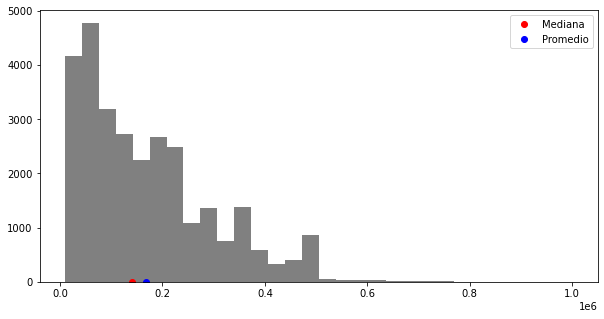

In [9]:
plt.figure(figsize=(10,5))
plt.hist(ValorCredito,bins=30,color="gray")
mediana = np.median(ValorCredito)
promedio = np.mean(ValorCredito)
plt.plot(mediana, 0, 'ro', label='Mediana')
plt.plot(promedio, 0, 'bo', label='Promedio')
plt.legend()  # Mostrar la leyenda
;

''

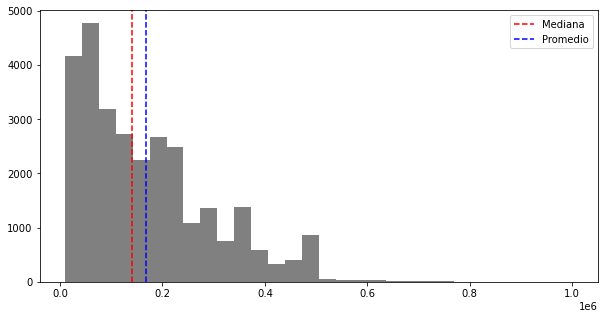

In [10]:
plt.figure(figsize=(10,5))
plt.hist(ValorCredito,bins=30,color="gray")
mediana = np.median(ValorCredito)
promedio = np.mean(ValorCredito)
plt.axvline(mediana, color='red', linestyle='--', label='Mediana')
plt.axvline(promedio, color='blue', linestyle='--', label='Promedio')
plt.legend()  # Mostrar la leyenda
;

In [11]:
ValorCredito.describe()

count      29163.000000
mean      168093.943696
std       130079.785428
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: ValorCredito, dtype: float64

**Verificamos Normalidad**

## **Verificar Normalidad**

**Gráfica Q-Q plot**

Gráfico Q-Q Los gráficos de cuantiles teóricos (Gráficos Q-Q). Estos gráficos comparan los cuantiles de la distribución observada con los cuantiles teóricos de una distribución normal con la misma media y desviación estándar que los datos. Cuanto más se aproximen los datos a una normal, más alineados están los puntos entorno a la recta.

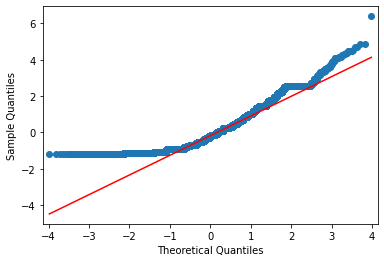

In [12]:
sms.qqplot(ValorCredito,fit=True, line="q");

**Pruba de Normalidad**

Una prueba de hipótesis es una regla que especifica si se puede aceptar o rechazar una afirmación acerca de una población dependiendo de la evidencia proporcionada por una muestra de datos.

Un punto de decisión importante al trabajar con una muestra de datos es si utilizar métodos estadísticos paramétricos o no paramétricos. Los métodos estadísticos paramétricos asumen que los datos tienen una distribución conocida y específica, a menudo una distribución gaussiana. Si una muestra de datos no es gaussiana, entonces se violan los supuestos de las pruebas estadísticas paramétricas y deben usarse métodos estadísticos no paramétricos.

**Interpretación de una prueba**
* H0: El monto del credito proviene de una distribucción Normal
* Ha:El monto del credito No proviene de una distribucción Normal

p valor;

* p <= alfa : rechazar H0, no es normal.
* p> alpha : No rechazar H0, No significa que sea cierta normalidad, Significa que es muy probable que sea Normal

Prueba de Shapiro-Wilk Shapiro-Wilk evalúa una muestra de datos y cuantifica la probabilidad de que los datos se extraigan de una distribución gaussiana, llamada así por Samuel Shapiro y Martin Wilk.

En la práctica, se cree que la prueba de Shapiro-Wilk es una prueba confiable de normalidad, aunque se sugiere que la prueba puede ser adecuada para muestras de datos más pequeñas, por ejemplo, miles de observaciones o menos

D'Agostino's K-squared test La prueba de D'Agostino-Pearson verifica si la forma de la distribución es similar a la forma de la distribución normal. Esta es una combinación de la prueba de asimetría y la prueba de curtosis

In [13]:
stat, p_value=stats.shapiro(ValorCredito)
print(p_value)

if (p_value < 0.05):
    print("Rechazo Normalidad")
else:
    print("La variable proviene de una distribucción normal")

0.0
Rechazo Normalidad


**Consecuencias de la falta de normalidad**

El hecho de no poder asumir la normalidad influye principalmente en los test de hipótesis paramétricos (t-test, anova,…) y en los modelos de regresión. Las principales consecuencias de la falta de normalidad son:

* Los estimadores mínimo-cuadráticos no son eficientes (de mínima varianza).

* Los intervalos de confianza de los parámetros del modelo y los contrastes de significancia son solamente aproximados y no exactos.

* Los test estadísticos expuestos requieren que la población de la que procede la muestra tenga una distribución normal, no la muestra en sí. Si la muestra se distribuye de forma normal, se puede aceptar que así lo hace la población de origen. En el caso de que la muestra no se distribuya de forma normal pero se tenga certeza de que la población de origen sí lo hace, entonces, puede estar justificado aceptar los resultados obtenidos por los contrastes paramétricos como válidos.

 **Normalidad puede estar afectada por Datos Atipicos**

* Detectar Datos Atípicos Univariado 

**Análisis Gráfico Univariado**

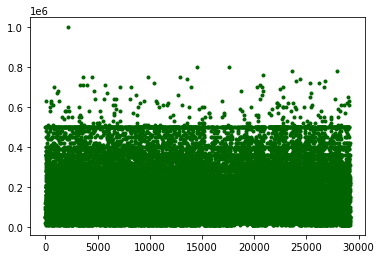

In [14]:
plt.plot(ValorCredito,".",color="darkgreen");

**Rango Intercuantil**

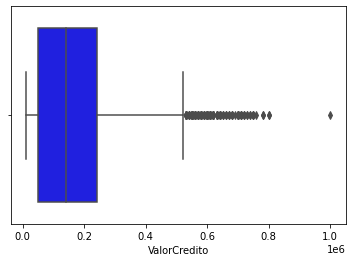

In [15]:
sns.boxplot(x=ValorCredito,color="blue");

In [16]:
q1,q3=np.percentile(ValorCredito,[25,75])

In [17]:
print(q1,q3)

50000.0 240000.0


In [18]:
RangoIntercuantil=q3-q1

In [19]:
print(RangoIntercuantil)

190000.0


In [20]:
## Limite Superior
Limite_Superior=q3+1.5*RangoIntercuantil

In [21]:
print(Limite_Superior)

525000.0


In [22]:
## Limite Superior
Limite_Inferior=q1-1.5*RangoIntercuantil

In [23]:
print(Limite_Inferior)

-235000.0


''

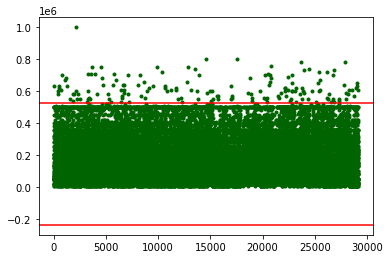

In [24]:
plt.plot(ValorCredito,".",color="darkgreen")
plt.axhline(y=Limite_Inferior,color="red")
plt.axhline(y=Limite_Superior,color="red")
;

In [25]:
df_Valor_Credito_Atipicos=df[(df.ValorCredito > Limite_Superior) | (df.ValorCredito < Limite_Inferior)].reset_index(drop=True)

In [26]:
(len(df_Valor_Credito_Atipicos)/len(df))*100

0.5589274080170079

In [27]:
df_Valor_Credito_Sin_Atipicos=df[(df.ValorCredito <= Limite_Superior) & (df.ValorCredito >= Limite_Inferior)].reset_index(drop=True)

In [28]:
(len(df_Valor_Credito_Sin_Atipicos)/len(df))*100

99.44107259198299

In [29]:
len(df_Valor_Credito_Atipicos)+len(df_Valor_Credito_Sin_Atipicos)

29163

In [30]:
len(df)

29163

''

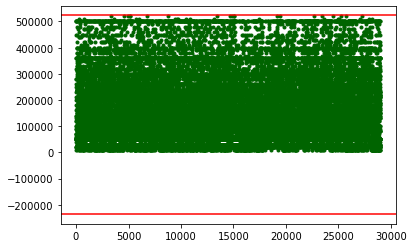

In [31]:
plt.plot(df_Valor_Credito_Sin_Atipicos.ValorCredito,".",color="darkgreen")
plt.axhline(y=Limite_Inferior,color="red")
plt.axhline(y=Limite_Superior,color="red")
;

''

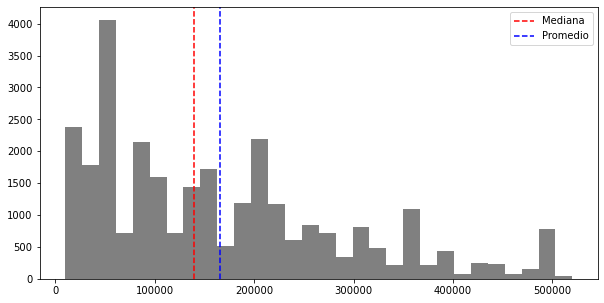

In [32]:
plt.figure(figsize=(10,5))
plt.hist(df_Valor_Credito_Sin_Atipicos.ValorCredito,bins=30,color="gray")
mediana = np.median(df_Valor_Credito_Sin_Atipicos.ValorCredito)
promedio = np.mean(df_Valor_Credito_Sin_Atipicos.ValorCredito)
plt.axvline(mediana, color='red', linestyle='--', label='Mediana')
plt.axvline(promedio, color='blue', linestyle='--', label='Promedio')
plt.legend()  # Mostrar la leyenda
;

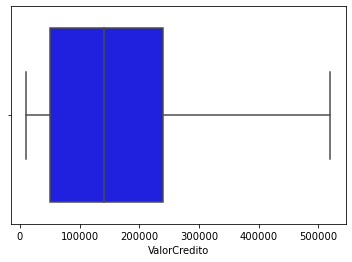

In [33]:
sns.boxplot(x=df_Valor_Credito_Sin_Atipicos.ValorCredito,color="blue");

In [34]:
df_Valor_Credito_Atipicos.head()

,ID,ValorCredito,Edad,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Mora,GeneroHomologado,EducacionHomologada,EstadoCivilHomologado
0,13,630000.0,41,-1,0,-1,-1,-1,-1,12137.0,...,1000.0,6500.0,6500.0,6500.0,2870.0,0.0,0,Mujer,Universidad,soltero
1,434,580000.0,36,0,0,0,0,0,0,159760.0,...,6422.0,6565.0,5951.0,6006.0,5894.0,5946.0,0,Mujer,Posgrado,casado
2,452,600000.0,53,2,2,0,0,0,0,467150.0,...,0.0,18000.0,16000.0,16000.0,21000.0,20000.0,1,Hombre,Posgrado,casado
3,528,620000.0,45,2,2,0,0,0,0,160837.0,...,0.0,6200.0,6000.0,6000.0,6500.0,6000.0,1,Mujer,Universidad,casado
4,556,630000.0,47,0,0,0,-1,-1,-2,37850.0,...,38187.0,1207.0,2632.0,8654.0,0.0,4981.0,0,Mujer,Universidad,casado


In [35]:
stat, p_value=stats.shapiro(df_Valor_Credito_Sin_Atipicos.ValorCredito)
print(p_value)

if (p_value < 0.05):
    print("Rechazo Normalidad")
else:
    print("La variable proviene de una distribucción normal")

0.0
Rechazo Normalidad


In [36]:
df_Valor_Credito_Sin_Atipicos.ValorCredito.describe()

count     29000.000000
mean     165561.851034
std      125854.363080
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      240000.000000
max      520000.000000
Name: ValorCredito, dtype: float64

# **Selección de Variables**

In [37]:
df.head(2)

,ID,ValorCredito,Edad,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Mora,GeneroHomologado,EducacionHomologada,EstadoCivilHomologado
0,1,20000.0,24,2,2,-1,-1,-2,-2,3913.0,...,0.0,689.0,0.0,0.0,0.0,0.0,1,Mujer,Universidad,casado
1,2,120000.0,26,-1,2,0,0,0,2,2682.0,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,Mujer,Universidad,soltero


In [38]:
df.Mora.value_counts()

0    22649
1     6514
Name: Mora, dtype: int64

In [39]:
df.Mora.value_counts(normalize=True) ## Categorico, dos clases (1: Morosos, 0: No Mora)

0    0.776635
1    0.223365
Name: Mora, dtype: float64

## **Numéricas vs Target(Mora (Categorica))**

In [40]:
col_numericas

['ValorCredito',
 'Edad',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [41]:
datos=df[["Mora","ValorCredito"]]

In [42]:
datos.groupby("Mora").agg(["mean","median","std"])

ValorCredito                         
               mean    median            std
Mora                                        
0     178807.276259  150000.0  132006.593461
1     130843.979122   90000.0  115673.740169

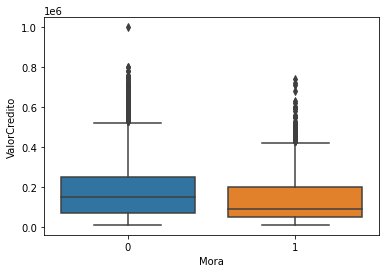

In [43]:
sns.boxplot(data=datos,x="Mora",y="ValorCredito");

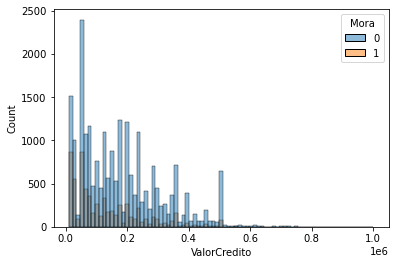

In [44]:
sns.histplot(data=datos,hue="Mora",x="ValorCredito");

**Probar Hipótesis**
* H0: No hay diferencias de Promedios de Valor del prestamo entre los Morosos y No Morosos
* Ha: Si hay diferencias de Promedios de Valor del prestamo entre los Morosos y No Morosos

**Validar Normalidad**

In [45]:
pg.normality(data=datos, dv="ValorCredito",group="Mora")

,W,pval,normal
Mora,,,
1,0.856354,0.0,False
0,0.920077,0.0,False


* Si no cumple normalidad, por teorema del limite central podemos asumir normalidad en convergencia al infinito, podemos aplicar aplicar la prueba

* Supuesto de Homocedasticidad: Igualdad de Varianza 

In [46]:
pg.homoscedasticity(data=datos, dv="ValorCredito",group="Mora")

,W,pval,equal_var
levene,233.682911,1.500224e-52,False


* No hay homocedasticidad, se tendría que realizar el t-test con la corrección de Welch. porque no hay homocedasticidad

In [47]:
ValorCreditoMorosos=datos["ValorCredito"][datos["Mora"]==1]
ValorCreditoNoMorosos=datos["ValorCredito"][datos["Mora"]==0]

In [48]:
pg.ttest(x=ValorCreditoMorosos,y=ValorCreditoNoMorosos)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-28.544104,11828.521715,two-sided,2.309265e-173,"[-51257.01, -44669.59]",0.373142,3.826e+172,1.0


* Pavlor mayor a 0.05; No se Puede Rechazar H0
* Pvalr Menor a 0.05; Se rechaza Ho, si acepta ha

* Si hay diferencias de Promedios de Valor del prestamo entre los Morosos y No Morosos

## **Automatizamos la Prueba para Todas las Variables**

In [49]:
def ImportanciaVariablesSeleccion(x_select,y,funcion,metodo):
    NumeroVariables=x_select.shape[1] # DImension datos
    MejoresPredictores=SelectKBest(score_func=funcion,k=NumeroVariables) # Aplico test medias para todos
    ajuste=MejoresPredictores.fit(x_select,y) # Ajuste
    Puntajes=pd.DataFrame(ajuste.scores_) # Resultados del Putaje
    Variables=pd.DataFrame(x_select.columns) # Nombre de las variables
    if (metodo=="parametrico"):
        Pvalor=pd.DataFrame(ajuste.pvalues_) # P valor
        df_variables= pd.concat([Variables,Puntajes,Pvalor],axis=1) # Unimos los resultados en tabla
        df_variables.columns=["Variables","Puntaje","Pvalor"] # Renombrar Variables
        df_variables=df_variables.sort_values("Puntaje",ascending=False) # Ordeno la tabla de Mayor a menos
    else:
        df_variables= pd.concat([Variables,Puntajes],axis=1) # Unimos los resultados en tabla
        df_variables.columns=["Variables","Puntaje"] # Renombrar Variables
        df_variables=df_variables.sort_values("Puntaje",ascending=False) # Ordeno la tabla de Mayor a menos
    return df_variables

In [50]:
df_numericas=df[col_numericas]

In [51]:
df_variables=ImportanciaVariablesSeleccion(x_select=df_numericas,y=df.Mora,funcion=f_classif,metodo="parametrico")

In [52]:
df_variables

,Variables,Puntaje,Pvalor
0,ValorCredito,704.391209,2.208629e-153
8,PAY_AMT1,173.358866,1.771477e-39
9,PAY_AMT2,107.122395,4.625058e-25
11,PAY_AMT4,96.968478,7.646590e-23
10,PAY_AMT3,96.147118,1.156218e-22
12,PAY_AMT5,91.043753,1.510917e-21
13,PAY_AMT6,86.464346,1.519015e-20
2,BILL_AMT1,10.610573,1.125713e-03
3,BILL_AMT2,5.432610,1.977091e-02
4,BILL_AMT3,5.385685,2.030948e-02


In [53]:
df_variables[df_variables["Pvalor"]>0.05]

,Variables,Puntaje,Pvalor
5,BILL_AMT4,2.655508,0.103203
6,BILL_AMT5,1.102882,0.293643
7,BILL_AMT6,0.689315,0.406404


In [54]:
SignificativasNumericasEstadistico=df_variables.Variables[df_variables["Pvalor"]<=0.05].tolist()
SignificativasNumericasEstadistico

['ValorCredito',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT4',
 'PAY_AMT3',
 'PAY_AMT5',
 'PAY_AMT6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'Edad']

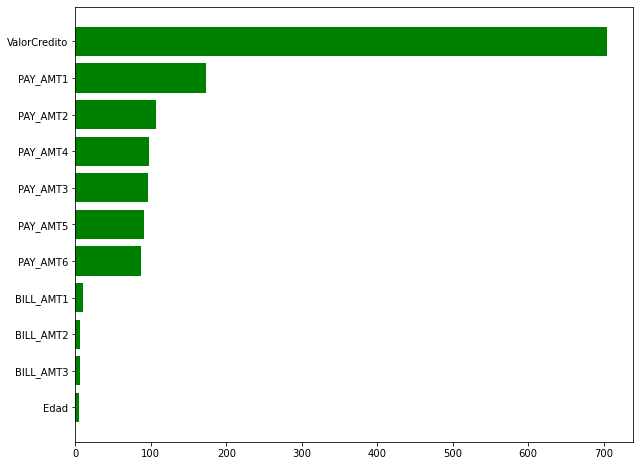

In [55]:
Significativas=df_variables[df_variables["Pvalor"]<=0.05]
Significativas=Significativas.sort_values("Puntaje",ascending=True)
fig, ax = plt.subplots(figsize =(10, 8))
name=Significativas.Variables
importancia=Significativas.Puntaje
ax.barh(name,importancia,color="green");

In [56]:
pd.DataFrame({"Variable": SignificativasNumericasEstadistico}).to_excel("NumericasParametricas.xlsx")

## Selección No Parametrica

* Se recomienda Estandarizar las Variables
StandardScaler es una técnica de preprocesamiento comúnmente utilizada en aprendizaje automático (machine learning) para estandarizar características o variables numéricas. Su objetivo es transformar los datos de manera que tengan una media igual a cero y una desviación estándar igual a uno.

z= (x-media)/std

In [57]:
scaler_standar=StandardScaler()

In [58]:
df_numericas_estandarizadas=pd.DataFrame(scaler_standar.fit_transform(df_numericas), columns=df_numericas.columns)

In [59]:
df_numericas_estandarizadas

,ValorCredito,Edad,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.138505,-1.240643,-0.641227,-0.646464,-0.667310,-0.671952,-0.663420,-0.653537,-0.355537,-0.234479,-0.307629,-0.313593,-0.316060,-0.293887
1,-0.369733,-1.022806,-0.657978,-0.665835,-0.638545,-0.621138,-0.606671,-0.598889,-0.355537,-0.220403,-0.248100,-0.248590,-0.316060,-0.180938
2,-0.600364,-0.151458,-0.296607,-0.492770,-0.481558,-0.449390,-0.417895,-0.392964,-0.259775,-0.197774,-0.248100,-0.248590,-0.250175,-0.011514
3,-0.907873,0.175297,-0.055062,-0.011556,0.034160,-0.232233,-0.187761,-0.158382,-0.229369,-0.174285,-0.236195,-0.242089,-0.245629,-0.237412
4,-0.907873,2.353668,-0.577218,-0.610337,-0.160050,-0.346752,-0.348942,-0.332936,-0.229369,1.394468,0.287654,0.271442,-0.270665,-0.255541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29158,0.399039,0.393134,1.876613,2.022438,2.330063,0.694758,-0.150344,-0.385741,0.180678,0.639510,-0.009809,-0.115527,0.013367,-0.237412
29159,-0.139101,0.828809,-0.671571,-0.664386,-0.626710,-0.532507,-0.578173,-0.653537,-0.239651,-0.106080,0.228007,-0.305208,-0.316060,-0.293887
29160,-1.061628,0.175297,-0.645962,-0.642890,-0.637448,-0.347715,-0.325355,-0.329148,-0.355537,-0.265662,1.001993,-0.040577,-0.184290,-0.118815
29161,-0.677242,0.610972,-0.716857,0.412541,0.424036,0.147633,-0.468699,0.166677,5.063380,-0.111375,-0.237504,-0.188396,3.173496,-0.192007


In [60]:
df_variables1=ImportanciaVariablesSeleccion(x_select=df_numericas_estandarizadas,y=df.Mora,funcion=mutual_info_classif,metodo="NoParametrico")

In [61]:
df_variables1=df_variables1.sort_values("Puntaje",ascending=True)

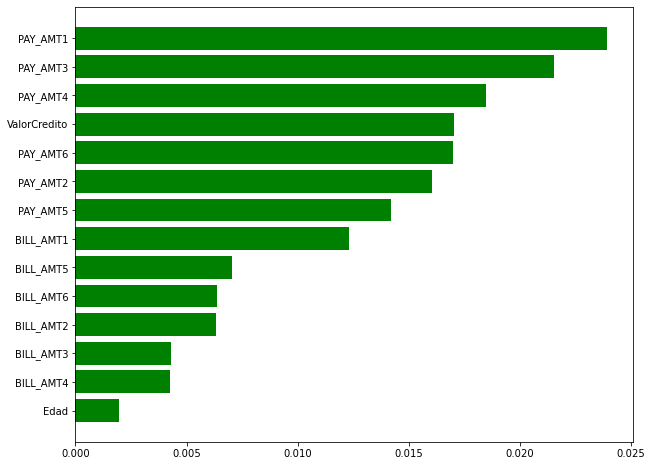

In [62]:
name=df_variables1.Variables
importancia=df_variables1.Puntaje

fig, ax = plt.subplots(figsize =(10, 8))

ax.barh(name,importancia,color="green");

In [63]:
df_variables1=df_variables1.sort_values("Puntaje",ascending=False)
df_variables1.head(11)[["Variables"]].to_excel("NumericasNoParametricas.xlsx")

# **Selección de Categorica vs Target (categorica)**

In [64]:
df_categoricas=df[col_cat].drop(columns="Mora")

In [65]:
df_categoricas=df_categoricas.astype("category")

In [66]:
Tabla_Contingencia= pd.crosstab(df_categoricas["GeneroHomologado"],df.Mora)

In [67]:
Tabla_Contingencia

Mora,0,1
GeneroHomologado,,
Hombre,8758,2817
Mujer,13891,3697


### Prueba de Hipotesis Chi2 de indepencia
* H0: Las variables Son independientes
* ha: Las variables son dependientes

In [68]:
Stad,pvalor=stats.chi2_contingency(Tabla_Contingencia)[:2]

In [69]:
pvalor

3.148418883358306e-11

* como p valor es menor a 0.05, se rechaza h0, podemos decirs que existe dependendia entre las variables

In [70]:
datos_dummies=pd.get_dummies(df_categoricas,drop_first=True)

In [71]:
datos_dummies

,PAY_0_-1,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,...,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,GeneroHomologado_Mujer,EducacionHomologada_Posgrado,EducacionHomologada_Universidad,EstadoCivilHomologado_soltero
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29158,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29159,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29160,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
29161,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
df_variables2=ImportanciaVariablesSeleccion(x_select=datos_dummies,y=df.Mora,funcion=chi2,metodo="parametrico") 

In [73]:
df_variables2

,Variables,Puntaje,Pvalor
3,PAY_0_2,3371.291593,0.000000
13,PAY_2_2,2499.893300,0.000000
23,PAY_3_2,1854.706335,0.000000
33,PAY_4_2,1597.814245,0.000000
42,PAY_5_2,1525.729889,0.000000
...,...,...,...
39,PAY_4_8,0.882290,0.347575
32,PAY_4_1,0.882290,0.347575
12,PAY_2_1,0.880571,0.348045
19,PAY_2_8,0.287607,0.591758


In [74]:
df_variables2[df_variables2["Pvalor"]>0.05] ## No aportan

,Variables,Puntaje,Pvalor
48,PAY_5_8,3.476973,0.062228
29,PAY_3_8,3.398499,0.065256
37,PAY_4_6,0.899270,0.342978
39,PAY_4_8,0.882290,0.347575
32,PAY_4_1,0.882290,0.347575
12,PAY_2_1,0.880571,0.348045
19,PAY_2_8,0.287607,0.591758
22,PAY_3_1,0.016358,0.898230


In [75]:
SignificativasCatEstadistico=df_variables2.Variables[df_variables2["Pvalor"]<=0.05].tolist()
SignificativasCatEstadistico

['PAY_0_2',
 'PAY_2_2',
 'PAY_3_2',
 'PAY_4_2',
 'PAY_5_2',
 'PAY_6_2',
 'PAY_0_0',
 'PAY_0_3',
 'PAY_2_0',
 'PAY_0_1',
 'PAY_2_3',
 'PAY_3_0',
 'PAY_6_3',
 'PAY_5_3',
 'PAY_3_3',
 'PAY_4_3',
 'PAY_3_-1',
 'PAY_4_0',
 'PAY_2_-1',
 'PAY_4_-1',
 'PAY_4_7',
 'PAY_5_7',
 'PAY_5_0',
 'PAY_5_-1',
 'PAY_6_0',
 'PAY_0_-1',
 'PAY_0_4',
 'PAY_6_7',
 'PAY_6_-1',
 'PAY_4_4',
 'PAY_5_4',
 'EducacionHomologada_Posgrado',
 'PAY_3_4',
 'PAY_3_7',
 'PAY_6_4',
 'PAY_2_4',
 'PAY_6_6',
 'PAY_2_5',
 'PAY_3_6',
 'PAY_2_6',
 'GeneroHomologado_Mujer',
 'PAY_4_5',
 'PAY_2_7',
 'PAY_0_7',
 'EducacionHomologada_Universidad',
 'PAY_3_5',
 'PAY_0_5',
 'PAY_0_8',
 'EstadoCivilHomologado_soltero',
 'PAY_5_5',
 'PAY_6_5',
 'PAY_6_8',
 'PAY_0_6',
 'PAY_5_6']

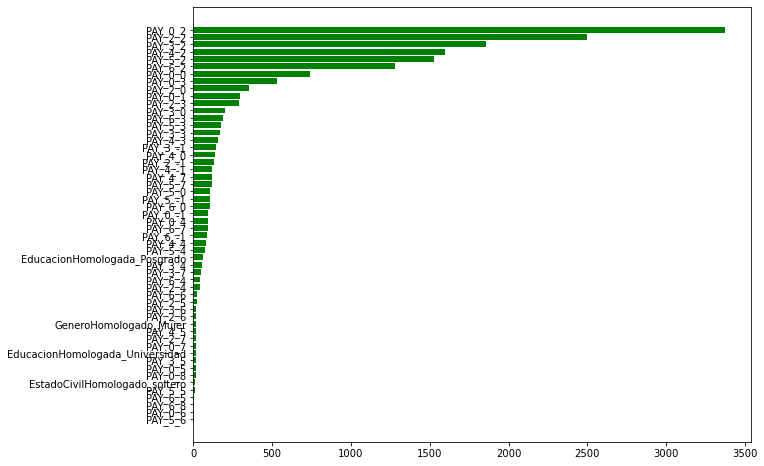

In [76]:
Significativas=df_variables2[df_variables2["Pvalor"]<=0.05]
Significativas=Significativas.sort_values("Puntaje",ascending=True)
fig, ax = plt.subplots(figsize =(10, 8))
name=Significativas.Variables
importancia=Significativas.Puntaje
ax.barh(name,importancia,color="green");